In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
games = pd.read_csv('games.csv').set_index('gameID')

In [3]:
games.head(5)

,team1,team2,winner,duration,gold1,gold2,kills1,kills2,bans1,bans2,towers1,inhibs1,barons1,dragons1,heralds1,towers2,inhibs2,barons2,dragons2,heralds2
gameID,,,,,,,,,,,,,,,,,,,,
1,T1,Team Liquid,T1,36:29,67.2k,66.5k,15,14,"['Ziggs', 'Neeko', 'Kalista', 'Kennen', 'Blitz...","['Caitlyn', 'Poppy', 'Azir', 'Jarvan IV', 'Gnar']",7,1,0,2,0,6,0,2,2,2
2,Cloud9,MAD Lions,Cloud9,30:60,59.8k,52.6k,10,3,"['Ivern', 'Kalista', 'Azir', 'Rumble', 'Ahri']","['Orianna', 'LeBlanc', 'Maokai', 'Nautilus', '...",9,1,2,3,1,4,0,0,1,1
3,Gen.G,GAM Esports,Gen.G,22:35,50.4k,37.4k,22,5,"['Syndra', 'Kalista', 'Maokai', 'Rumble', 'Ren...","['Poppy', 'Rakan', 'Orianna', 'Taliyah', 'LeBl...",9,2,1,2,1,1,0,0,0,1
4,Team BDS,JD Gaming,JD Gaming,27:05,47k,53.2k,6,14,"['Kalista', 'Taliyah', 'Kennen', 'Neeko', 'Ren...","['Darius', 'Orianna', 'Maokai', 'Azir', 'Olaf']",5,0,0,1,1,9,2,1,3,1
5,G2 Esports,Dplus KIA,G2 Esports,42:12,80.8k,68.3k,16,9,"['Caitlyn', 'Jarvan IV', 'Lee Sin', 'Vi', 'Rum...","['Neeko', 'Kalista', ""K'Sante"", 'Jax', 'Pyke']",10,2,1,5,2,4,0,2,1,0


## Teams

In [4]:
teams = games[['team1', 'team2']].apply(pd.value_counts)
teams['total games'] = teams['team1'] + teams['team2']
teams = teams.merge(right=games['winner'].value_counts(), how='left', left_on=teams.index, right_on='winner').set_index('winner').convert_dtypes()
teams.index.rename('team', inplace=True)
teams.rename(columns={'count': 'wins'}, inplace=True)
teams.drop(columns=['team1', 'team2'], inplace=True)
teams.fillna(0, inplace=True)

teams['loses'] = teams['total games'] - teams['wins']
teams['w/r %'] = round(teams['wins'] / teams['total games'] * 100, 2)
teams.sort_values(by='w/r %', ascending=False, inplace=True)
teams

,total games,wins,loses,w/r %
team,,,,
T1,15,13,2,86.67
Gen.G,9,6,3,66.67
JD Gaming,13,8,5,61.54
Weibo Gaming,19,11,8,57.89
Bilibili Gaming,18,9,9,50.0
Dplus KIA,8,4,4,50.0
KT Rolster,12,6,6,50.0
NRG,8,4,4,50.0
LNG Esports,11,5,6,45.45


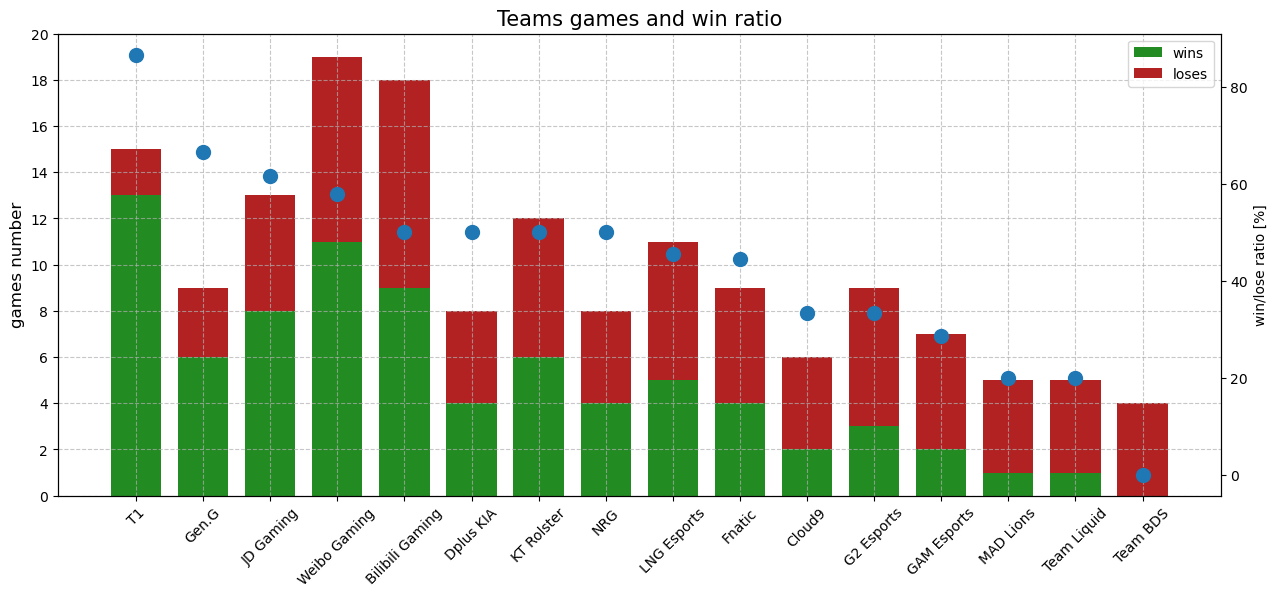

In [5]:
fig, ax = plt.subplots(figsize=(15, 6))

bottom = np.zeros(16)
labels = ['wins', 'loses']
colors = ['forestgreen', 'firebrick']
width = 0.75

ax.set_title('Teams games and win ratio', size=15)

for i, values in enumerate([teams.wins.values, teams.loses.values]):
    ax.bar(teams.index, values, width, label=labels[i], color=colors[i], bottom=bottom)
    bottom += values

ax.set_ylabel('games number', size=12)
ax.set_yticks([i for i in range(0, 21, 2)])
ax.grid(linestyle='--', alpha=.7)
plt.xticks(rotation=45)

ax2 = ax.twinx()
ax2.plot(teams.index, teams['w/r %'], marker='o', linewidth=0, markersize=10)
ax2.set_ylabel('win/lose ratio [%]', size=10)

ax.legend()

plt.show()

### Blue side vs red side

In [6]:
sides = games[['team1', 'team2', 'winner']].copy()
#sides = pd.DataFrame(0, np.arange(len(games)), columns=['blue', 'red'])
sides['blue'] = sides.apply(lambda x: 1 if x['winner'] == x['team1'] else 0, axis=1)
sides['red'] = sides.apply(lambda x: 1 if x['winner'] == x['team2'] else 0, axis=1)

sides[['blue', 'red']].sum()

blue    47
red     32
dtype: int64

<Axes: title={'center': 'Blue/red side win ratio'}>

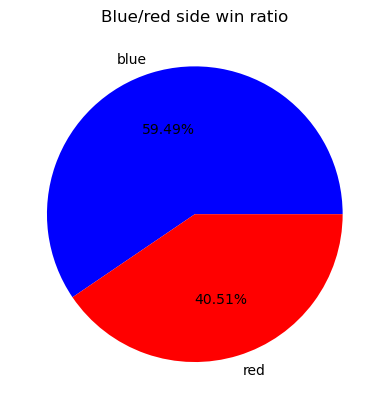

In [7]:
sides[['blue', 'red']].sum().plot(
    kind='pie',
    colors=['blue', 'red'],
    autopct=f'%1.2f%%',
    title='Blue/red side win ratio'
)

## Game length

In [8]:
length = games[['duration']].copy()
length['duration'] = pd.to_datetime(length['duration'], format='%M:%S')
shortest = games.loc[games['duration'] == games['duration'].min()]
s_t1, s_t2, s_w = shortest.team1.values[0], shortest.team2.values[0], shortest.winner.values[0]
longest = games.loc[games['duration'] == games['duration'].max()]
l_t1, l_t2, l_w = longest.team1.values[0], longest.team2.values[0], longest.winner.values[0]

print(f"Shortest game - {games['duration'].min()} {s_t1} vs {s_t2} // winner {s_w}")
print(f"Longest game - {games['duration'].max()} {l_t1} vs {l_t2} // winner {l_w}")
print(f"Average game length {str(length['duration'].mean())[-15:-10]}")

Shortest game - 22:26 T1 vs Cloud9 // winner T1
Longest game - 46:11 Gen.G vs Bilibili Gaming // winner Gen.G
Average game length 31:10


## Gold statistics

In [9]:
gold = games[['team1', 'team2', 'winner', 'duration', 'gold1', 'gold2']].copy()
gold['gold1'] = gold['gold1'].str[:-1].astype('float')
gold['gold2'] = gold['gold2'].str[:-1].astype('float')

#### Max team gold

In [10]:
maxi = gold[['gold1', 'gold2']].max().max()
max_gold = gold.loc[(gold.gold1 == maxi) | (gold.gold2 == maxi)]
max_minutes = int(max_gold.duration.values[0].split(':')[0]) + round(int(max_gold.duration.values[0].split(':')[1]) / 60, 2)
max_gpm = round(max_gold.gold1.values[0] / max_minutes * 1000)
print(f"{max_gold.team1.values[0]} earned {max_gold.gold1.values[0]}k in winning game vs {max_gold.team2.values[0]}\n\
That's {max_gpm} gold per minute")
max_gold

Gen.G earned 90.3k in winning game vs Bilibili Gaming
That's 1955 gold per minute


,team1,team2,winner,duration,gold1,gold2
gameID,,,,,,
58,Gen.G,Bilibili Gaming,Gen.G,46:11,90.3,77.1


#### Min team gold

In [11]:
mini = gold[['gold1', 'gold2']].min().min()
min_gold = gold.loc[(gold.gold1 == mini) | (gold.gold2 == mini)]
min_minutes = int(min_gold.duration.values[0].split(':')[0]) + round(int(min_gold.duration.values[0].split(':')[1]) / 60, 2)
min_gpm = round(min_gold.gold2.values[0] / min_minutes * 1000)
print(f"{min_gold.team2.values[0]} earned {min_gold.gold2.values[0]}k in losing game vs {min_gold.team1.values[0]}\n\
That's {min_gpm} gold per minute")
min_gold

Cloud9 earned 34.5k in losing game vs T1
That's 1538 gold per minute


,team1,team2,winner,duration,gold1,gold2
gameID,,,,,,
22,T1,Cloud9,T1,22:26,48.8,34.5


#### Biggest gold difference

In [12]:
gold['diff'] = abs(gold.gold1 - gold.gold2)
gold.loc[gold['diff'] == gold['diff'].max()]

,team1,team2,winner,duration,gold1,gold2,diff
gameID,,,,,,,
57,Bilibili Gaming,Gen.G,Bilibili Gaming,28:01,58.8,42.4,16.4


### Gold per minute

In [13]:
t1 = games[['team1', 'gold1', 'duration']].copy()
t1.rename(columns={'team1': 'team', 'gold1': 'gold'}, inplace=True)
t2 = games[['team2', 'gold2', 'duration']].copy()
t2.rename(columns={'team2': 'team', 'gold2': 'gold'}, inplace=True)
gpm = pd.concat([t1, t2]).reset_index()
gpm.drop(['gameID'], axis=1, inplace=True)

gpm['gold'] = gpm['gold'].str[:-1].astype('float')
gpm['duration'] = gpm['duration'].str.split(':').str[0].astype('int')\
    + round(gpm['duration'].str.split(':').str[1].astype('int') / 60, 2)
gpm['gpm'] = round(gpm['gold'] / gpm['duration'] * 1000)
gpm = gpm.groupby('team').mean()

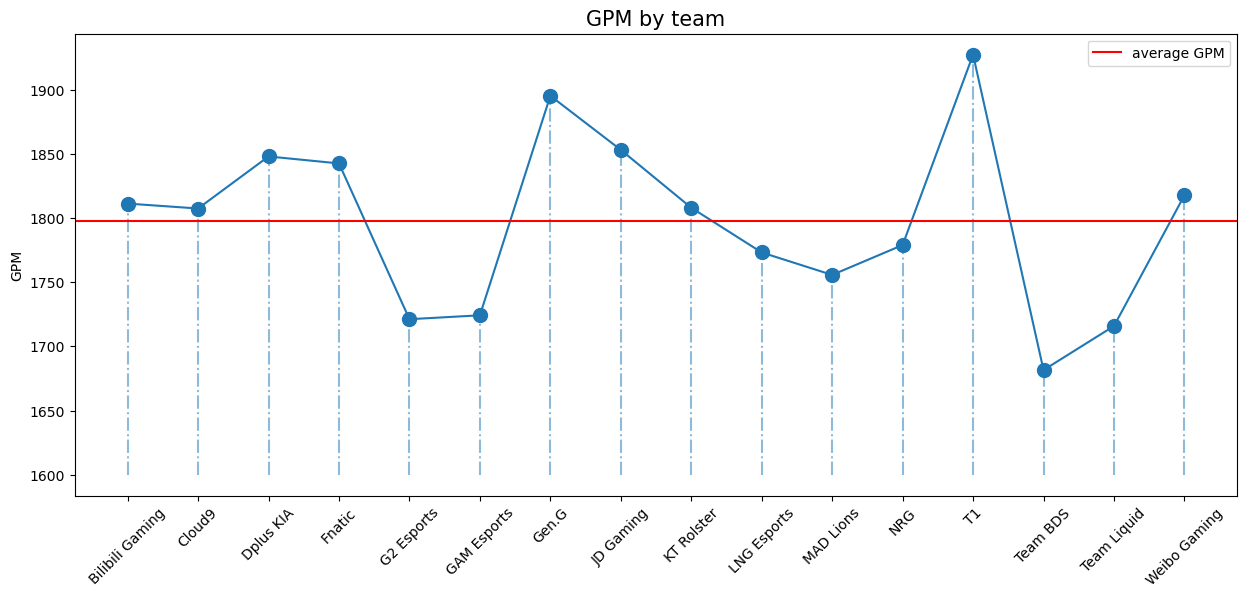

In [14]:
fig, ax = plt.subplots(figsize=(15, 6))

ax.plot(gpm.index, gpm['gpm'], marker='o', markersize=10)
ax.vlines(x=gpm.index, ymin=1600, ymax=gpm['gpm'], linestyle='-.', alpha=.5)
ax.set_ylabel('GPM')

plt.axhline(y=gpm['gpm'].mean(), color='red', label='average GPM')
plt.xticks(rotation=45)
plt.legend()
plt.title('GPM by team', size=15)

plt.show()

In [15]:
gpm['gpm'].mean()

1797.4832507404876